In [21]:
#Working with Linear Regression
#Name - Ayyub Jose

#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
#Load Dataset
data=pd.read_csv('Concrete_Data.csv ')
data.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [23]:
#Show Key Statistics
data.describe()


,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<AxesSubplot:>

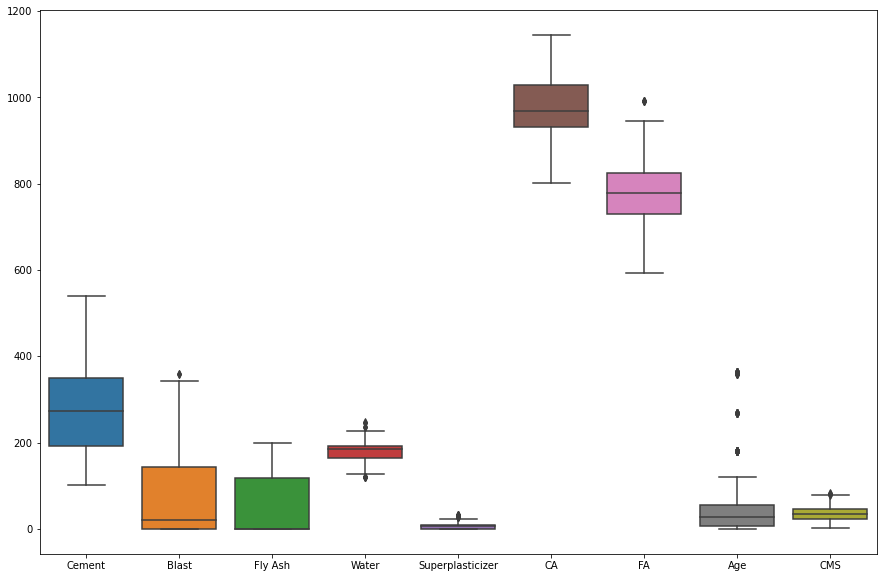

In [24]:
#Boxplot Visualization
plt.figure(figsize=(15,10))
sns.boxplot(data=data)

In [27]:
#Define x and y variable
x = data.drop('CMS',axis=1).to_numpy()
y = data['CMS'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [18]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),data.drop('CMS',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


Method: Linear Regression

Intercept: 35.95


                  Coefficients
Cement               13.027382
Blast                 8.952089
Fly Ash               5.955866
Water                -2.849777
Superplasticizer      1.737942
CA                    1.592146
FA                    2.035610
Age                   7.219311

R2: 0.62
Mean Absolute Error: 8.26
Mean Squared Error: 113.18
Root Mean Squared Error: 10.64


The Concrete Compressive Strength(CMS) is a dependant value based on how different materials are mixed. With the analysis of the independent variables, we expect the predictive model of the CMS value to be highly accurate.

CRM = 35.95 + 13.0*(Cement) + 8.95*(Blast) + 5.96*(Fly Ash) - 2.85*(Water) + 1.74*(Super) + 1.59*(CA) + 2.04 *(FA) + 7.2 *(Age)

R value is 62% which is not very good. More work needs to be done on the model

The RMSE is 10.64 which is more than 10% of the mean value of the CMS. The algorithm is not accurate and more work needs to be done to make it more accurate.

In [16]:
#Forecast Table
predict2 = predict.T
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
FcstTble.head(10)


Forecast Table


,Actual,Predicted,Difference
0,68.10,61.1,-7.0
1,71.30,53.6,-17.7
2,25.18,22.3,-2.9
3,19.52,27.9,8.3
4,38.02,51.6,13.6
